<a href="https://colab.research.google.com/github/CdeCMx-org/proyectos-2021-club_7_2/blob/main/Copia_de_Childhood_Obesity_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import collections

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 40 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main

# 1.- Medidas de la teoría de redes Proteína-proteína y Fármaco-proteína

Visualizamos la red de proteína-proteína

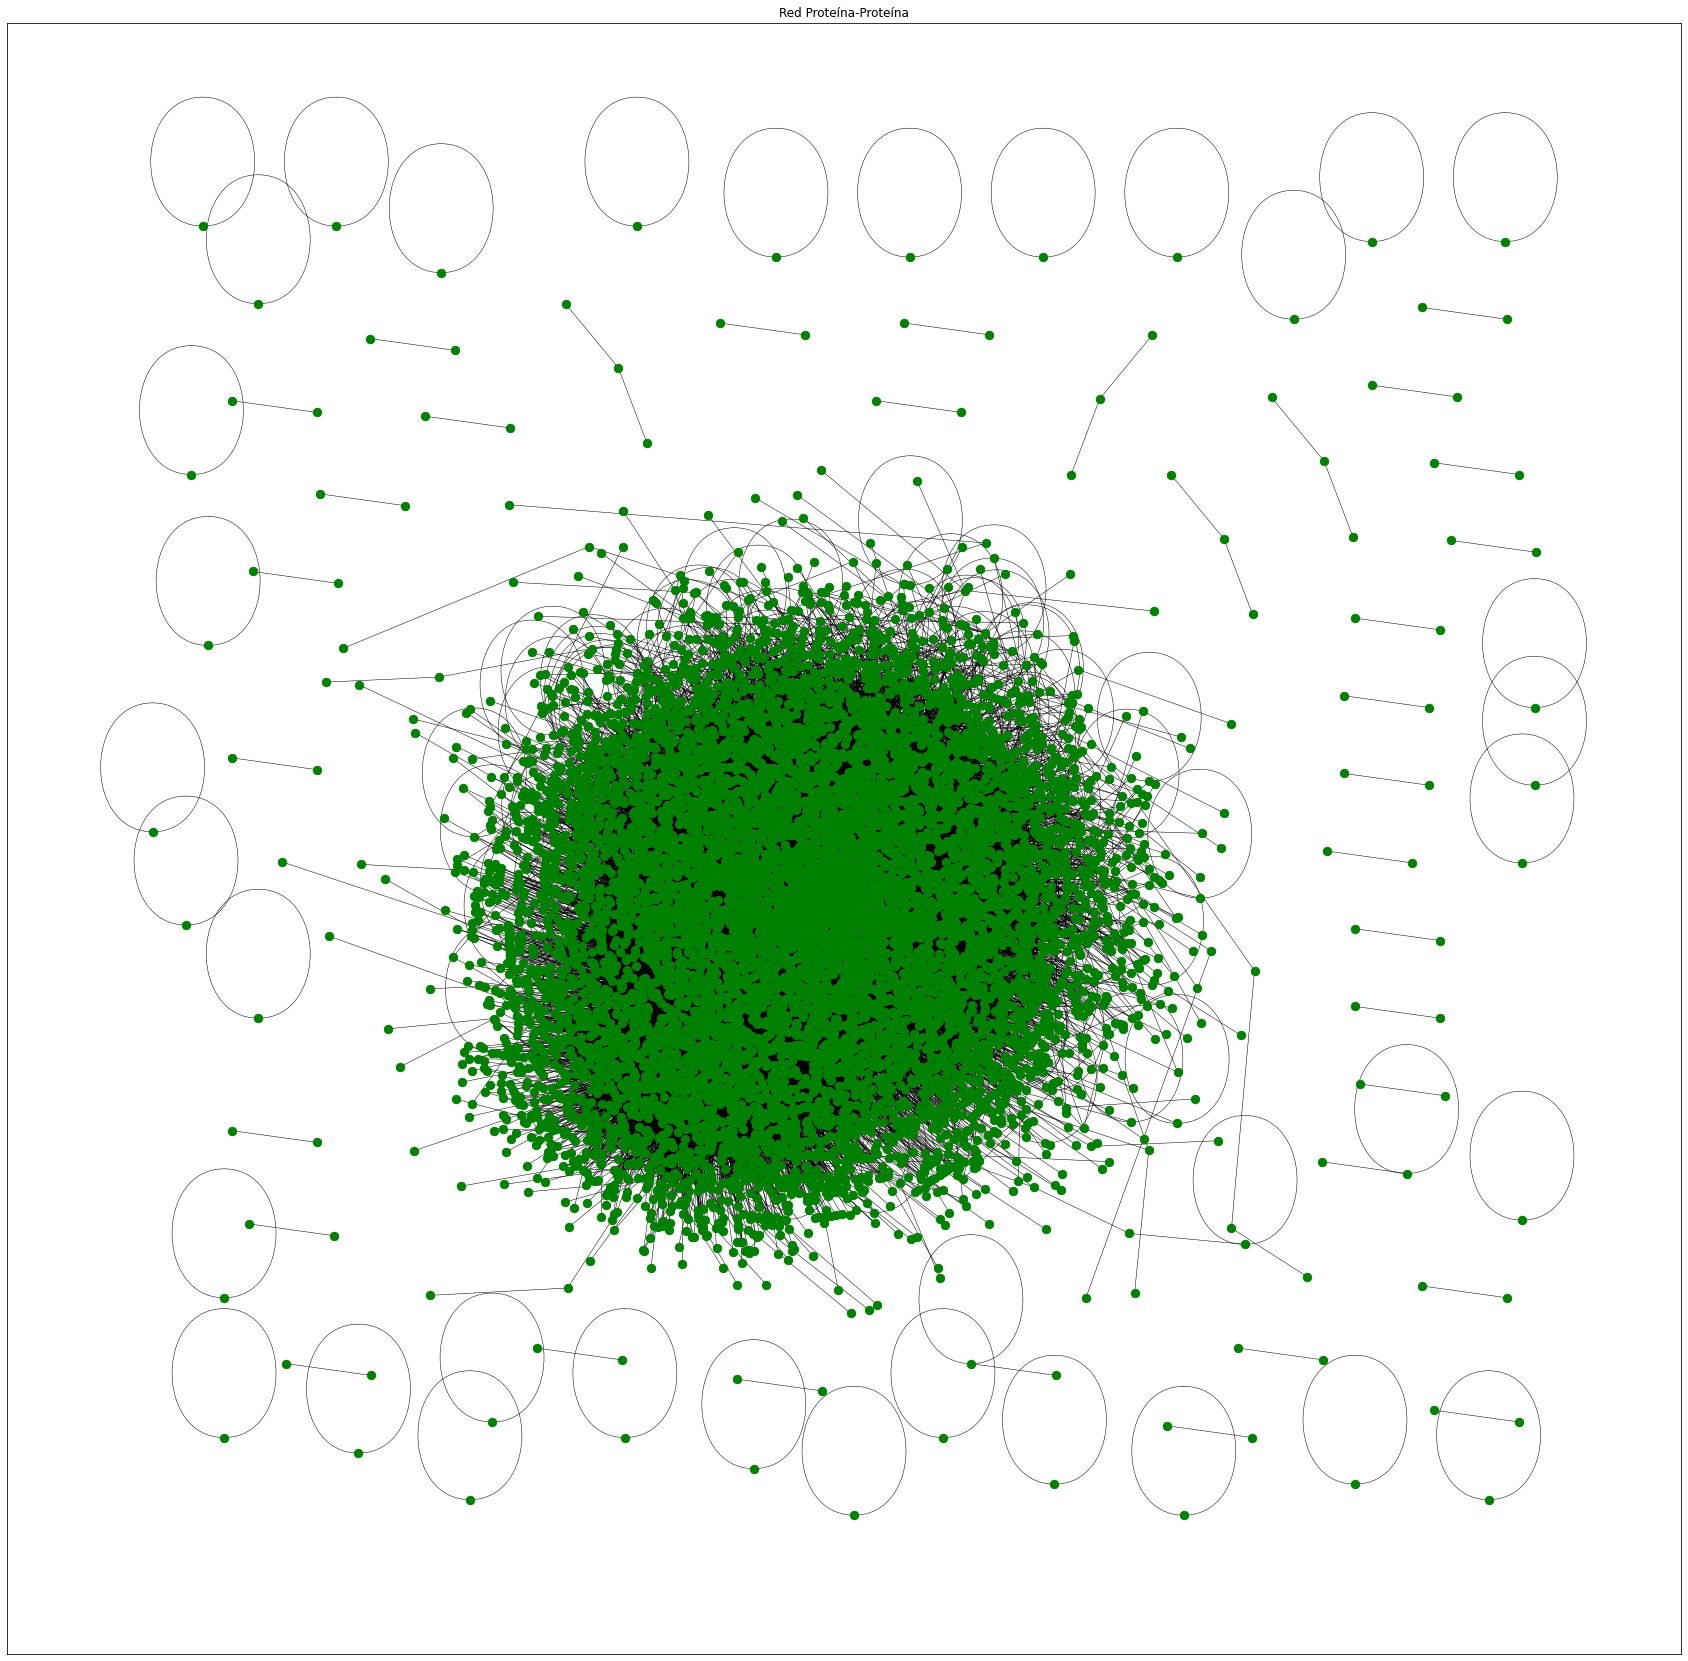

<Figure size 432x288 with 0 Axes>

In [ ]:
G_PPI = nx.read_graphml("/content/HI_union.graphml")
pos = nx.nx_agraph.graphviz_layout(G_PPI,prog='neato')
plt.figure(figsize=(30, 30))
nx.draw_networkx_nodes(G_PPI, pos=pos,node_size=70,  node_color = 'green')
nx.draw_networkx_edges(G_PPI, pos=pos,width=0.5,arrows=False)
plt.title("Red Proteína-Proteína")
plt.show()
plt.savefig('G_PPI.png')


General info from graphs
---



Red de Protein-protein interactions: visualizamos información de la red



In [ ]:
G_PPI = nx.read_graphml("/content/HI_union.graphml")
print(nx.info(G_PPI))
G_PPI=nx.Graph(G_PPI)
print(nx.info(G_PPI))



DiGraph named 'HI_union' with 9094 nodes and 64006 edges
Graph named 'HI_union' with 9094 nodes and 64006 edges


Identificamos el nombre de cada uno de los nodos de la red; y cambiamos el color para el gráfico a verde (green)

In [ ]:
G_PPI.nodes
labels=dict(G_PPI.nodes(data="symobl"))
print(labels)
PPI=nx.relabel_nodes(G_PPI,labels,copy=True)
print(PPI.nodes())

{'8346': 'TNMD', '8345': 'SPAG4', '8344': 'BCL2L13', '8343': 'BNIP3L', '8342': 'CD33', '8341': 'HHLA2', '8340': 'FAM209A', '8339': 'C12orf10', '8338': 'FCGR1A', '8337': 'CREB3L1', '8336': 'TMEM79', '8335': 'GGT6', '8334': 'ARL13B', '8333': 'BNIP3', '8332': 'AMIGO1', '8331': 'TMEM106A', '8330': 'KIR3DL3', '8329': 'DPM1', '8328': 'MEOX2', '5263': 'TDO2', '8327': 'SCYL3', '8326': 'GABARAPL2', '8325': 'TXN2', '8324': 'GABARAPL1', '5686': 'LHX8', '8323': 'TCAF1', '8322': 'C1orf112', '8321': 'P4HA3', '8320': 'FUCA2', '8319': 'WNT11', '8318': 'TNPO2', '8317': 'HOXA1', '8316': 'NUFIP2', '8315': 'PIN1', '8314': 'GUCD1', '8313': 'LCE1E', '8312': 'LCE1A', '8311': 'LCE4A', '8310': 'VWC2', '8309': 'KRTAP5-3', '8308': 'LCE1B', '8307': 'KRTAP5-2', '8306': 'KRTAP4-12', '8305': 'KRTAP10-1', '8304': 'NFYA', '7148': 'APPBP2', '8303': 'NFYC', '8302': 'CSNK2A1', '8301': 'NFYB', '8300': 'ATXN1', '8299': 'ZC3H10', '8298': 'VEZF1', '8297': 'POU2F1', '8296': 'POGZ', '8295': 'LUC7L2', '8294': 'DVL3', '8293': 'G

In [ ]:
labels = 'green'
nx.set_node_attributes(PPI, labels, "node_color")
print(PPI.nodes(data=True))

[('TNMD', {'name': 'ensembl:ENSG00000000005', 'symobl': 'TNMD', 'node_color': 'green'}), ('SPAG4', {'name': 'ensembl:ENSG00000061656', 'symobl': 'SPAG4', 'node_color': 'green'}), ('BCL2L13', {'name': 'ensembl:ENSG00000099968', 'symobl': 'BCL2L13', 'node_color': 'green'}), ('BNIP3L', {'name': 'ensembl:ENSG00000104765', 'symobl': 'BNIP3L', 'node_color': 'green'}), ('CD33', {'name': 'ensembl:ENSG00000105383', 'symobl': 'CD33', 'node_color': 'green'}), ('HHLA2', {'name': 'ensembl:ENSG00000114455', 'symobl': 'HHLA2', 'node_color': 'green'}), ('FAM209A', {'name': 'ensembl:ENSG00000124103', 'symobl': 'FAM209A', 'node_color': 'green'}), ('C12orf10', {'name': 'ensembl:ENSG00000139637', 'symobl': 'C12orf10', 'node_color': 'green'}), ('FCGR1A', {'name': 'ensembl:ENSG00000150337', 'symobl': 'FCGR1A', 'node_color': 'green'}), ('CREB3L1', {'name': 'ensembl:ENSG00000157613', 'symobl': 'CREB3L1', 'node_color': 'green'}), ('TMEM79', {'name': 'ensembl:ENSG00000163472', 'symobl': 'TMEM79', 'node_color': 

# Degree

Clasificamos los nodos por grado en una lista de tuplas, de mayor a menor interacciones

In [ ]:
degree_count = sorted(PPI.degree, key=lambda x: x[1], reverse=True)
node, degree = zip(*degree_count)
print(node)
print(degree)

('MEOX2', 'CYSRT1', 'GOLGA2', 'LNX1', 'KRTAP10-8', 'MDFI', 'WDYHV1', 'KRT40', 'KRT31', 'NOTCH2NL', 'NBPF19', 'AES', 'PICK1', 'MTUS2', 'AQP6', 'TRAF2', 'HSF2BP', 'HOXA1', 'REL', 'TRIM27', 'KRTAP10-7', 'SDCBP', 'KRT34', 'UBQLN2', 'HGS', 'FAM209A', 'TMEM14B', 'MID2', 'USHBP1', 'INCA1', 'CEP70', 'RBPMS', 'ENKD1', 'GOLGA6L9', 'KRTAP10-9', 'DDIT4L', 'TFIP11', 'ERGIC3', 'KIFC3', 'ADAMTSL4', 'GPR152', 'LZTS2', 'KANK2', 'KRTAP5-9', 'ABI2', 'KRTAP1-1', 'CREB3L1', 'KRTAP6-2', 'TCF4', 'BANP', 'TRIM54', 'TRAF1', 'ZNF417', 'EBP', 'TRIM23', 'UBQLN1', 'KRTAP1-3', 'PLEKHF2', 'SCNM1', 'CD79A', 'CCHCR1', 'TMX2', 'LMO2', 'SPG21', 'CALCOCO2', 'KRTAP6-3', 'FAM90A1', 'CREB3', 'SGTA', 'UBE2I', 'ZNF655', 'GPX8', 'DAZAP2', 'PSMA1', 'IKZF3', 'KRTAP4-12', 'CCDC33', 'CCDC57', 'OTX1', 'MKRN3', 'SLC10A6', 'PRKAB2', 'ZRANB1', 'KRTAP12-3', 'POU6F2', 'DVL3', 'TRIM42', 'C1orf109', 'KRT15', 'BYSL', 'KRT27', 'TMEM31', 'PNMA1', 'KRTAP9-2', 'CARD9', 'KRTAP10-1', 'FAM161A', 'FAM9B', 'KRTAP10-5', 'CCDC85B', 'NCK2', 'AGTRAP', 

El top 5 de los nodos con mayores interacciones en esta red (PPI) son: 1.-MEOX2; 2.-CYSRT1; 3.-GOLGA2; 4.-LNX1; 5.-KRTAP10-8

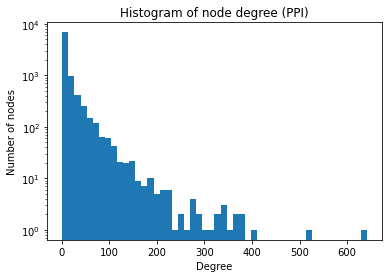

In [ ]:
degree=list(dict(nx.degree(PPI)).values())
plt.hist(degree,bins=50)
plt.title('Histogram of node degree (PPI)')
plt.ylabel('Number of nodes')
plt.xlabel('Degree')
plt.semilogy()
plt.show()

# Distances

Graficamos también la distancia que hay entre pares de nodos.

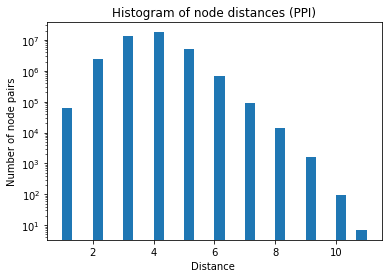

Time (s): 368.04796132599995


In [ ]:
from timeit import default_timer
start=default_timer()

distance_PPI=dict(nx.shortest_path_length(G_PPI))
#To get all distances, we need to make sure the node is reachable, so we need an if condition for each n1
distances_vals_PPI=[distance_PPI[n1][n2] for n1 in G_PPI.nodes() for n2 in G_PPI.nodes() if (n1>n2 and n2 in distance_PPI[n1].keys())]
plt.hist(distances_vals_PPI,bins=30)
plt.title('Histogram of node distances (PPI)')
plt.ylabel('Number of node pairs')
plt.xlabel('Distance ')
plt.semilogy()
plt.show()

end=default_timer()
print("Time (s):",end-start)

# Betweenness Centrality

Calculamos la centralidad que hay entre cada uno de los nodos de la red.

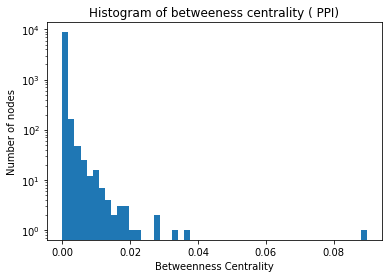

Time (s): 1063.3652071279998


In [ ]:
from timeit import default_timer
start=default_timer()

# You can generate a dictionary containing the node and the BC
betweenness_PPI = nx.betweenness_centrality(PPI)
# Make values into a list
bc_PPI = list(betweenness_PPI.values())
plt.hist(bc_PPI,bins=50)
plt.title('Histogram of betweeness centrality ( PPI)')
plt.ylabel('Number of nodes')
plt.xlabel('Betweenness Centrality')
plt.semilogy()
plt.show()


end=default_timer()
print("Time (s):",end-start)

# Red de Proteinas-Fármacos (Drugbank)

Visualizamos el gráfico de la red Protein-Drug interactions.

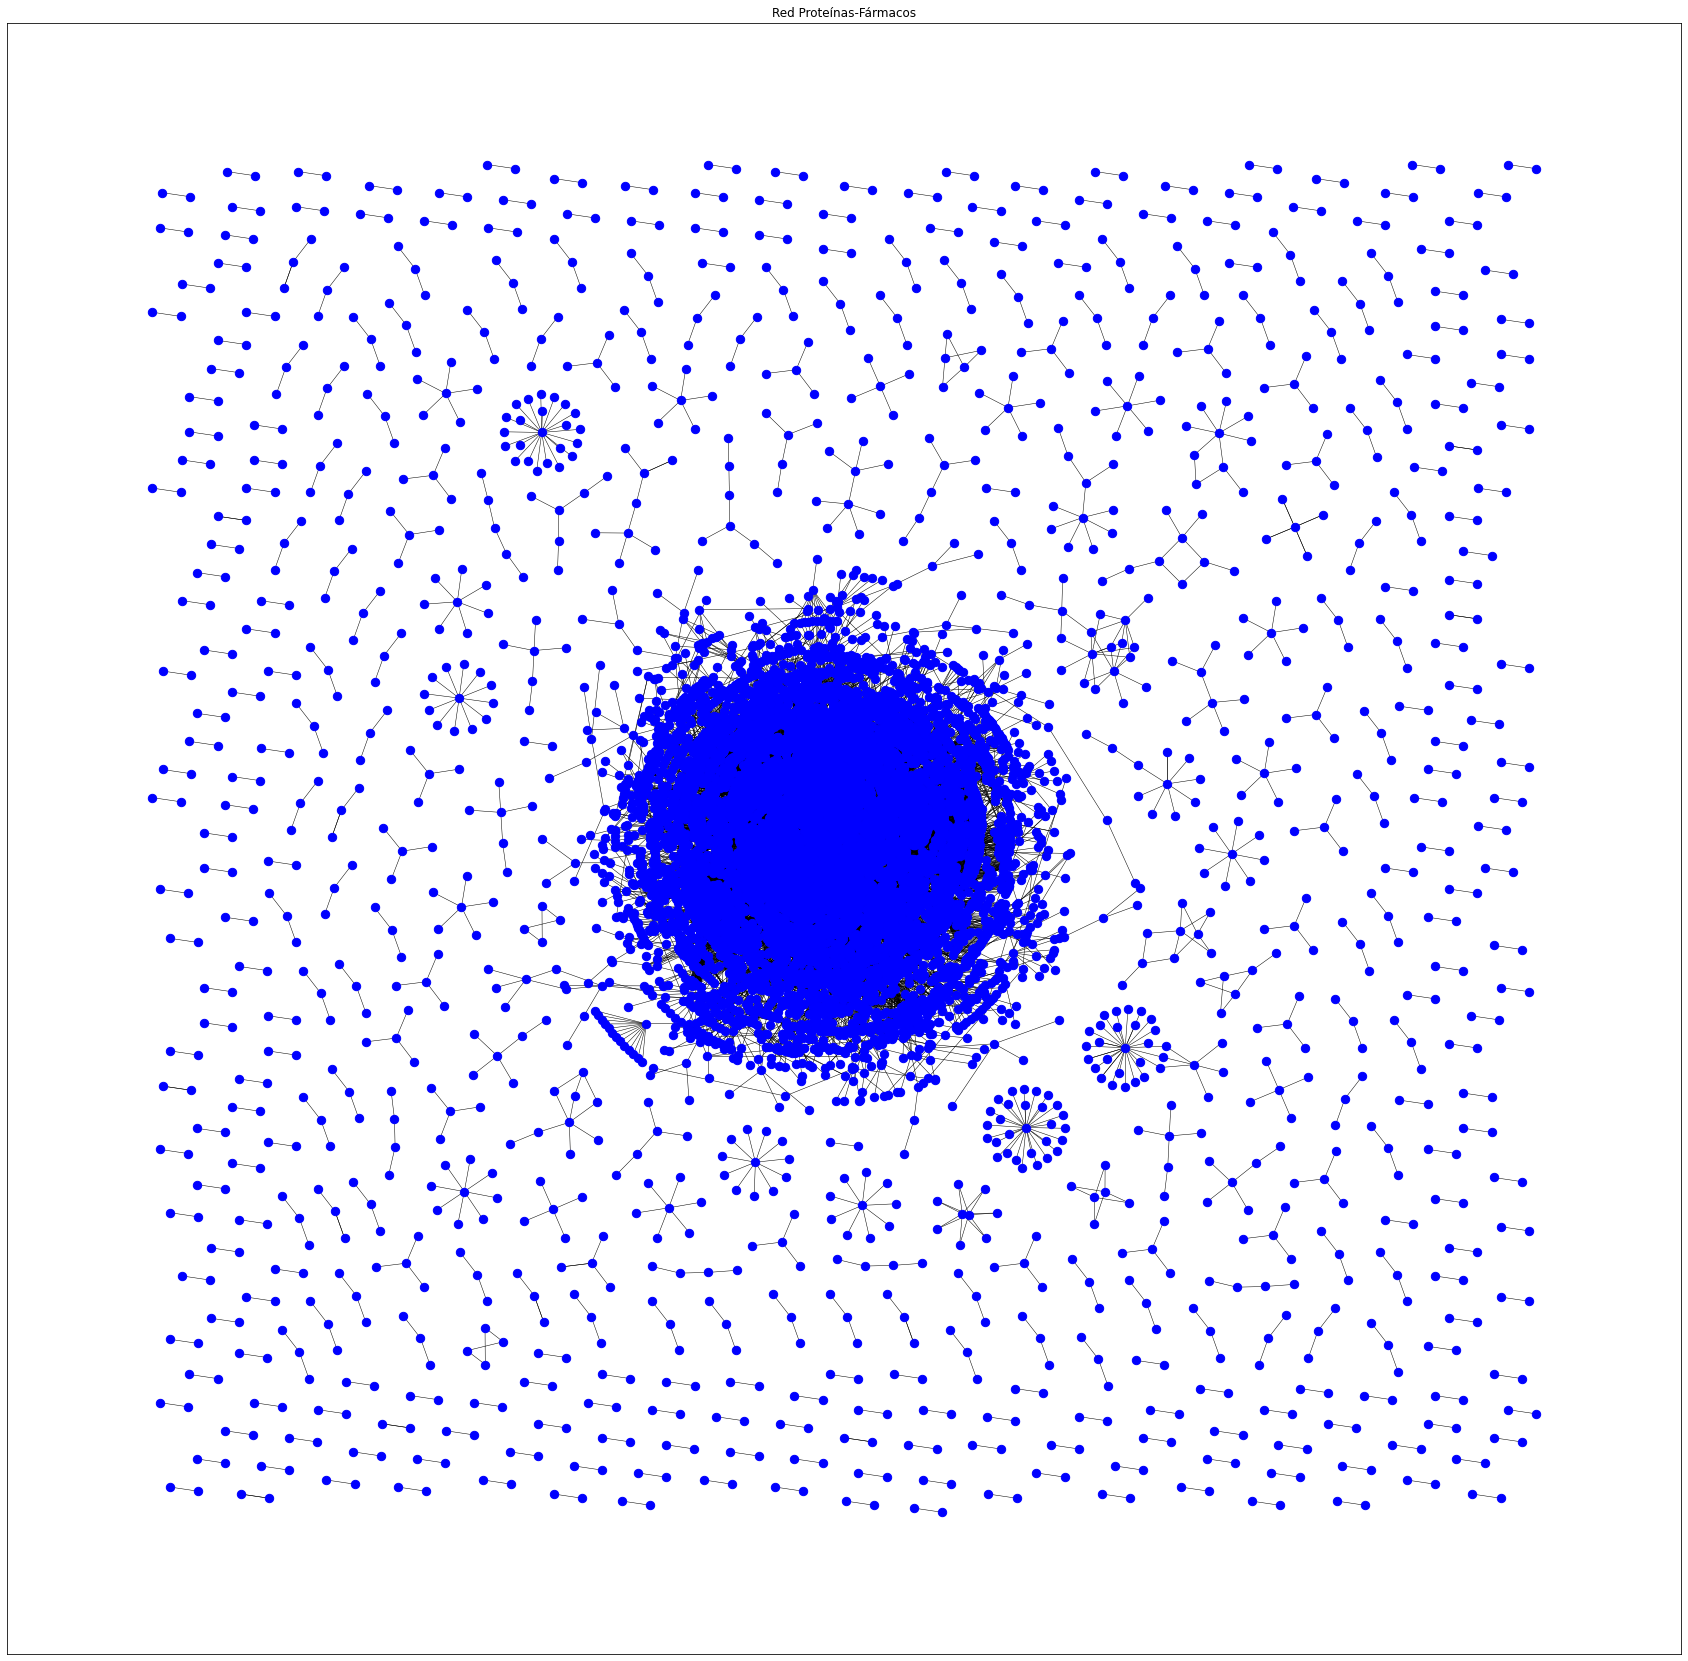

<Figure size 432x288 with 0 Axes>

In [ ]:
G_PFI = nx.read_graphml("/content/DrugBank - Target drugs.graphml")
pos = nx.nx_agraph.graphviz_layout(G_PFI,prog='neato')
plt.figure(figsize=(30, 30))
nx.draw_networkx_nodes(G_PFI, pos=pos,node_size=70,  node_color = 'blue')
nx.draw_networkx_edges(G_PFI, pos=pos,width=0.5,arrows=False)
plt.title("Red Proteínas-Fármacos")
plt.show()
plt.savefig('G_PFI.png')

# General info from graphs

Visualizamos la información general de la red y el nombre de los nodos.

In [ ]:
G_PFI = nx.read_graphml("/content/DrugBank - Target drugs.graphml")
print(nx.info(G_PFI))
G_PFI=nx.Graph(G_PFI)
print(nx.info(G_PFI))


MultiDiGraph named 'DrugBank - Target drugs' with 11407 nodes and 19650 edges
Graph named 'DrugBank - Target drugs' with 11407 nodes and 19212 edges


In [ ]:
G_PFI.nodes
labels=dict(G_PFI.nodes(data="name"))
print(labels)
PFI=nx.relabel_nodes(G_PFI,labels,copy=True)
print(PFI.nodes())

{'0': 'UNDECYLAMINE-N,N-DIMETHYL-N-OXIDE', '1': 'A1', '2': "Diguanosine-5'-Triphosphate", '3': 'A103R', '4': "Guanosine-5'-Triphosphate", '5': 'Zinc', '6': 'A1BG', '7': 'Copper', '8': 'Zinc acetate', '9': 'Zinc chloride', '10': 'Becaplermin', '11': 'A2M', '12': 'Cisplatin', '13': 'Bacitracin', '14': 'Ocriplasmin', '15': 'Silver', '16': 'N-Acetylmethionine', '17': 'Aaar', '18': 'O-Succinylbenzoate', '19': 'N-Succinyl Phenylglycine', '20': 'N-Succinyl Methionine', '21': "3'-Phosphate-Adenosine-5'-Diphosphate", '22': 'aac', '23': 'Coenzyme A', '24': 'Ribostamycin', '25': "aac(6')-Ii", '26': 'aacC1', '27': 'Spermidine', '28': 'Gibberellic acid', '29': 'AADACL2', '30': 'GIBBERELLIN A4', '31': 'Pyridoxal phosphate', '32': 'AADAT', '33': 'Glutamic Acid', '34': 'Fostamatinib', '35': 'AAK1', '36': 'Coa-S-Trimethylene-Acetyl-Tryptamine', '37': 'AANAT', '38': 'Coa-S-Acetyl Tryptamine', '39': 'Coa-S-Acetyl 5-Bromotryptamine', '40': 'L-Alanine', '41': 'AARS', '42': 'AARS2', '43': 'AASS', '44': 'NAD

#Degree


Identificamos los nodos con mayores interacciones en la red, de mayor a menor, y lo graficamos

In [ ]:
degree_count = sorted(PFI.degree, key=lambda x: x[1], reverse=True)
node, degree = zip(*degree_count)
print(node)
print(degree)

('Fostamatinib', 'Artenimol', 'Copper', 'NADH', 'CDK2', 'gag-pol', 'Zinc', 'Zinc acetate', 'Zinc chloride', 'ESR1', 'F2', 'ADRA1A', 'HTR2A', 'DRD2', 'HRH1', 'CHRM1', 'CA2', 'PRSS1', 'ADRA2A', 'ADRA1B', 'CHRM2', 'HTR1A', 'GABRA1', 'CHRM3', 'PTGS2', 'ADRB2', 'PTGS1', 'AR', 'ADRA2B', 'Beta-D-Glucose', 'GABRA2', 'GABRA3', 'ADRB1', 'PPARG', 'Flavin adenine dinucleotide', 'HTR2C', 'ADRA2C', 'GABRA5', 'Glutamic Acid', 'ADRA1D', 'SLC6A2', 'SLC6A4', 'GABRA4', 'GABRA6', 'NR1I2', 'F10', 'DRD1', 'OPRM1', 'Citric Acid', 'GABRG2', 'NR3C1', 'ACHE', 'CHRM4', 'GABRB3', 'Pyridoxal phosphate', 'ESR2', 'PTPN1', "2'-Monophosphoadenosine 5'-Diphosphoribose", 'GABRB1', 'GABRB2', 'GABRG1', 'MAPK14', 'GABRG3', 'DPP4', 'GABRD', 'GABRE', 'GABRP', 'Ethanol', "Guanosine-5'-Diphosphate", 'CHRM5', 'DRD3', 'OPRK1', 'PYGM', 'Phosphoaminophosphonic Acid-Adenylate Ester', 'GABRQ', 'HSP90AA1', 'Olanzapine', 'SRC', 'Formic acid', 'ampC', 'KCNH2', 'SLC6A3', 'PPARA', 'Phenethyl Isothiocyanate', 'OPRD1', 'Amoxapine', 'Flavin

El top 5 de los nodos con mayores interacciones en esta red (PFI) son: 1.-Fostamatinib; 2.-Artenimol; 3.-Copper 4.-NADH; 5.-CDK2

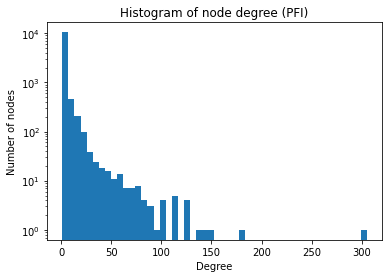

In [ ]:
degree=list(dict(nx.degree(PFI)).values())
plt.hist(degree,bins=50)
plt.title('Histogram of node degree (PFI)')
plt.ylabel('Number of nodes')
plt.xlabel('Degree')
plt.semilogy()
plt.show()

# Distances

También calculamos la distancia de los pares de nodos de la red en cuestión.

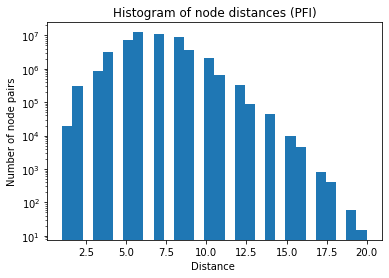

Time (s): 309.18887872899995


In [ ]:
from timeit import default_timer
start=default_timer()

distance_PFI=dict(nx.shortest_path_length(G_PFI))
#To get all distances, we need to make sure the node is reachable, so we need an if condition for each n1
distances_vals_PFI=[distance_PFI[n1][n2] for n1 in G_PFI.nodes() for n2 in G_PFI.nodes() if (n1>n2 and n2 in distance_PFI[n1].keys())]
plt.hist(distances_vals_PFI,bins=30)
plt.title('Histogram of node distances (PFI)')
plt.ylabel('Number of node pairs')
plt.xlabel('Distance ')
plt.semilogy()
plt.show()

end=default_timer()
print("Time (s):",end-start)

# Betweenness Centrality

Calculamos la centralidad entre cada uno de los nodos que componen la red.

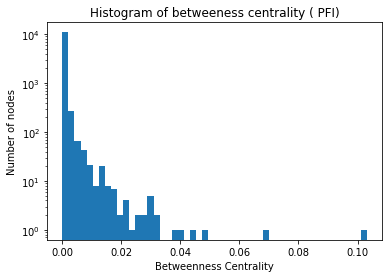

Time (s): 1606.170791298


In [ ]:
from timeit import default_timer
start=default_timer()

# You can generate a dictionary containing the node and the BC
betweenness_PFI = nx.betweenness_centrality(PFI)
# Make values into a list
bc_PFI = list(betweenness_PFI.values())
plt.hist(bc_PFI,bins=50)
plt.title('Histogram of betweeness centrality ( PFI)')
plt.ylabel('Number of nodes')
plt.xlabel('Betweenness Centrality')
plt.semilogy()
plt.show()


end=default_timer()
print("Time (s):",end-start)

In [ ]:
D = nx.relabel_nodes(G_PFI, labels, copy=True)
dict_color={}
for node in D.nodes():
  if (D.nodes(data="type")[node]=="protein"):
    dict_color[node]="skyblue"
  else:
    dict_color[node]="orange"
nx.set_node_attributes(D, dict_color, 'node_color')
print(D.nodes(data="node_color"))

[('UNDECYLAMINE-N,N-DIMETHYL-N-OXIDE', 'orange'), ('A1', 'skyblue'), ("Diguanosine-5'-Triphosphate", 'orange'), ('A103R', 'skyblue'), ("Guanosine-5'-Triphosphate", 'orange'), ('Zinc', 'orange'), ('A1BG', 'skyblue'), ('Copper', 'orange'), ('Zinc acetate', 'orange'), ('Zinc chloride', 'orange'), ('Becaplermin', 'orange'), ('A2M', 'skyblue'), ('Cisplatin', 'orange'), ('Bacitracin', 'orange'), ('Ocriplasmin', 'orange'), ('Silver', 'orange'), ('N-Acetylmethionine', 'orange'), ('Aaar', 'skyblue'), ('O-Succinylbenzoate', 'orange'), ('N-Succinyl Phenylglycine', 'orange'), ('N-Succinyl Methionine', 'orange'), ("3'-Phosphate-Adenosine-5'-Diphosphate", 'orange'), ('aac', 'skyblue'), ('Coenzyme A', 'orange'), ('Ribostamycin', 'orange'), ("aac(6')-Ii", 'skyblue'), ('aacC1', 'skyblue'), ('Spermidine', 'orange'), ('Gibberellic acid', 'orange'), ('AADACL2', 'skyblue'), ('GIBBERELLIN A4', 'orange'), ('Pyridoxal phosphate', 'orange'), ('AADAT', 'skyblue'), ('Glutamic Acid', 'orange'), ('Fostamatinib', '

#2.- Combinamos ambas redes y buscamos los mismos datos

In [ ]:
listNetworks = [PPI, D]
G_Combined_Networks = nx.compose_all(listNetworks)
print(nx.info(G_Combined_Networks))

Graph named 'DrugBank - Target drugs' with 19300 nodes and 83197 edges


In [ ]:
G_Combined_Networks.nodes(data=True)

NodeDataView({'TNMD': {'name': 'ensembl:ENSG00000000005', 'symobl': 'TNMD', 'node_color': 'green'}, 'SPAG4': {'name': 'ensembl:ENSG00000061656', 'symobl': 'SPAG4', 'node_color': 'green'}, 'BCL2L13': {'name': 'ensembl:ENSG00000099968', 'symobl': 'BCL2L13', 'node_color': 'green'}, 'BNIP3L': {'name': 'ensembl:ENSG00000104765', 'symobl': 'BNIP3L', 'node_color': 'green'}, 'CD33': {'name': 'CD33', 'symobl': 'CD33', 'node_color': 'skyblue', 'represents': 'uniprot:P20138', 'UniProt Name': 'Myeloid cell surface antigen CD33', 'type': 'protein'}, 'HHLA2': {'name': 'ensembl:ENSG00000114455', 'symobl': 'HHLA2', 'node_color': 'green'}, 'FAM209A': {'name': 'ensembl:ENSG00000124103', 'symobl': 'FAM209A', 'node_color': 'green'}, 'C12orf10': {'name': 'ensembl:ENSG00000139637', 'symobl': 'C12orf10', 'node_color': 'green'}, 'FCGR1A': {'name': 'FCGR1A', 'symobl': 'FCGR1A', 'node_color': 'skyblue', 'represents': 'uniprot:P12314', 'UniProt Name': 'High affinity immunoglobulin gamma Fc receptor I', 'type': '

In [ ]:
degree_count = sorted(G_Combined_Networks.degree, key=lambda x: x[1], reverse=True)
node, degree = zip(*degree_count)
print(node)
print(degree)

('MEOX2', 'CYSRT1', 'GOLGA2', 'LNX1', 'KRTAP10-8', 'MDFI', 'WDYHV1', 'KRT40', 'KRT31', 'NOTCH2NL', 'NBPF19', 'AES', 'PICK1', 'MTUS2', 'Fostamatinib', 'AQP6', 'TRAF2', 'HSF2BP', 'HOXA1', 'REL', 'TRIM27', 'KRTAP10-7', 'SDCBP', 'KRT34', 'UBQLN2', 'HGS', 'FAM209A', 'TMEM14B', 'MID2', 'USHBP1', 'INCA1', 'CEP70', 'RBPMS', 'ENKD1', 'GOLGA6L9', 'KRTAP10-9', 'DDIT4L', 'TFIP11', 'ERGIC3', 'KIFC3', 'ADAMTSL4', 'GPR152', 'LZTS2', 'KANK2', 'KRTAP5-9', 'ABI2', 'KRTAP1-1', 'CREB3L1', 'KRTAP6-2', 'TCF4', 'BANP', 'TRIM54', 'TRAF1', 'Artenimol', 'EBP', 'ZNF417', 'TRIM23', 'UBQLN1', 'KRTAP1-3', 'PLEKHF2', 'SCNM1', 'CD79A', 'CCHCR1', 'TMX2', 'LMO2', 'SPG21', 'CALCOCO2', 'KRTAP6-3', 'FAM90A1', 'CREB3', 'SGTA', 'UBE2I', 'GPX8', 'PSMA1', 'ZNF655', 'DAZAP2', 'IKZF3', 'PRKAB2', 'KRTAP4-12', 'CCDC33', 'CCDC57', 'OTX1', 'MKRN3', 'Copper', 'SLC10A6', 'ZRANB1', 'KRTAP12-3', 'POU6F2', 'DVL3', 'TRIM42', 'NADH', 'C1orf109', 'KRT15', 'BYSL', 'KRT27', 'TMEM31', 'PNMA1', 'KRTAP9-2', 'CARD9', 'KRTAP10-1', 'FAM161A', 'FAM

El top 5 de los nodos con mayores interacciones en esta red combinada (G_Combined_Networks) son:
1.-MEOX2;
2.-CYSRT1;
3.-GOLGA2;
4.-LNX1;
5.-KRTAP10-8.

3.- Escoger un grupo de genes: subimos la tabla de nuestro grupo de genes

In [ ]:
childhood_obesity = pd.read_csv('/content/childhood obesity.csv') 
genes = list(childhood_obesity['Mapped gene'])
print(len(genes))
childhood_obesity.head()

62


Variant and risk allele   P-value  ... Study accession     Location
0     rs12073359-<b>?</b>  5 x 10-6  ...      GCST002904  1:150036820
1      rs2925630-<b>T</b>  4 x 10-6  ...      GCST009382  16:28607811
2      rs2749808-<b>T</b>  5 x 10-6  ...      GCST009382  20:55573956
3      rs7940756-<b>A</b>  7 x 10-6  ...      GCST009382  11:28676708
4     rs34414412-<b>A</b>  8 x 10-6  ...      GCST009382   4:63481560

[5 rows x 13 columns]

Filtramos la red combinada con los datos de la lista de genes para identificar los datos que coinciden.

In [ ]:
overlap = list(set(genes)&set(G_Combined_Networks.nodes()))
print(type(overlap))
print(len(overlap))

<class 'list'>
12


4.-Hicimos un subgrafo de la red combinada (G_Combined_Networks) con la lista de genes, para poder graficarla posteriormente. Esto lo hicimos para poder identificar los genes y los posibles fármacos que puedan ser útiles de acuerdo a la importancia de estos genes. 

In [ ]:
childhood_neighbors=list(set([neigh for node in overlap for neigh in G_Combined_Networks.neighbors(node)]))
childhood_neighbors_node=childhood_neighbors+childhood_neighbors+overlap

P = G_Combined_Networks.subgraph(childhood_neighbors_node)
print(P.nodes(data=True))
print(len(P.nodes()))

[('CLP1', {'name': 'ensembl:ENSG00000172409', 'symobl': 'CLP1', 'node_color': 'green'}), ('MMP26', {'name': 'MMP26', 'represents': 'uniprot:Q9NRE1', 'UniProt Name': 'Matrix metalloproteinase-26', 'type': 'protein', 'node_color': 'skyblue'}), ('RUNX1T1', {'name': 'ensembl:ENSG00000079102', 'symobl': 'RUNX1T1', 'node_color': 'green'}), ('CFAP206', {'name': 'ensembl:ENSG00000272514', 'symobl': 'CFAP206', 'node_color': 'green'}), ('GNG13', {'name': 'ensembl:ENSG00000127588', 'symobl': 'GNG13', 'node_color': 'green'}), ('P-Nitrophenol', {'name': 'P-Nitrophenol', 'represents': 'drugbank:DB04417', 'type': 'chemical', 'class': 'small molecule', 'node_color': 'orange'}), ('Nabiximols', {'name': 'Nabiximols', 'represents': 'drugbank:DB14011', 'type': 'chemical', 'class': 'small molecule', 'node_color': 'orange'}), ('DAPP1', {'name': 'DAPP1', 'symobl': 'DAPP1', 'node_color': 'skyblue', 'represents': 'uniprot:Q9UN19', 'UniProt Name': 'Dual adapter for phosphotyrosine and 3-phosphotyrosine and 3-ph

In [ ]:
node_colors=dict(P.nodes(data="node_color")).values()
print(node_colors)

dict_values(['green', 'skyblue', 'green', 'green', 'green', 'orange', 'orange', 'skyblue', 'green', 'green', 'orange', 'skyblue', 'orange', 'orange', 'orange', 'green', 'orange', 'orange', 'orange', 'orange', 'orange', 'skyblue', 'green', 'green', 'orange', 'green', 'green', 'green', 'skyblue', 'green', 'skyblue', 'green', 'green', 'green', 'green', 'green', 'orange', 'green', 'green', 'green', 'orange', 'skyblue', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'orange', 'green', 'green', 'green', 'green', 'orange', 'green', 'green', 'green', 'green', 'orange', 'green', 'green', 'green', 'skyblue', 'green', 'skyblue', 'green', 'skyblue', 'green', 'green', 'green', 'skyblue', 'green', 'green', 'green', 'green', 'skyblue', 'green', 'green', 'green', 'skyblue', 'orange', 'green', 'green', 'orange', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'skyblue', 'green', 'orange', 'green', 'green', 'green', 'green', 'green', 'green', 'gr

Graficamos el subgrafo de la red combinada acoplada a la lsita de genes que está relacionados con la obesidad infantil.

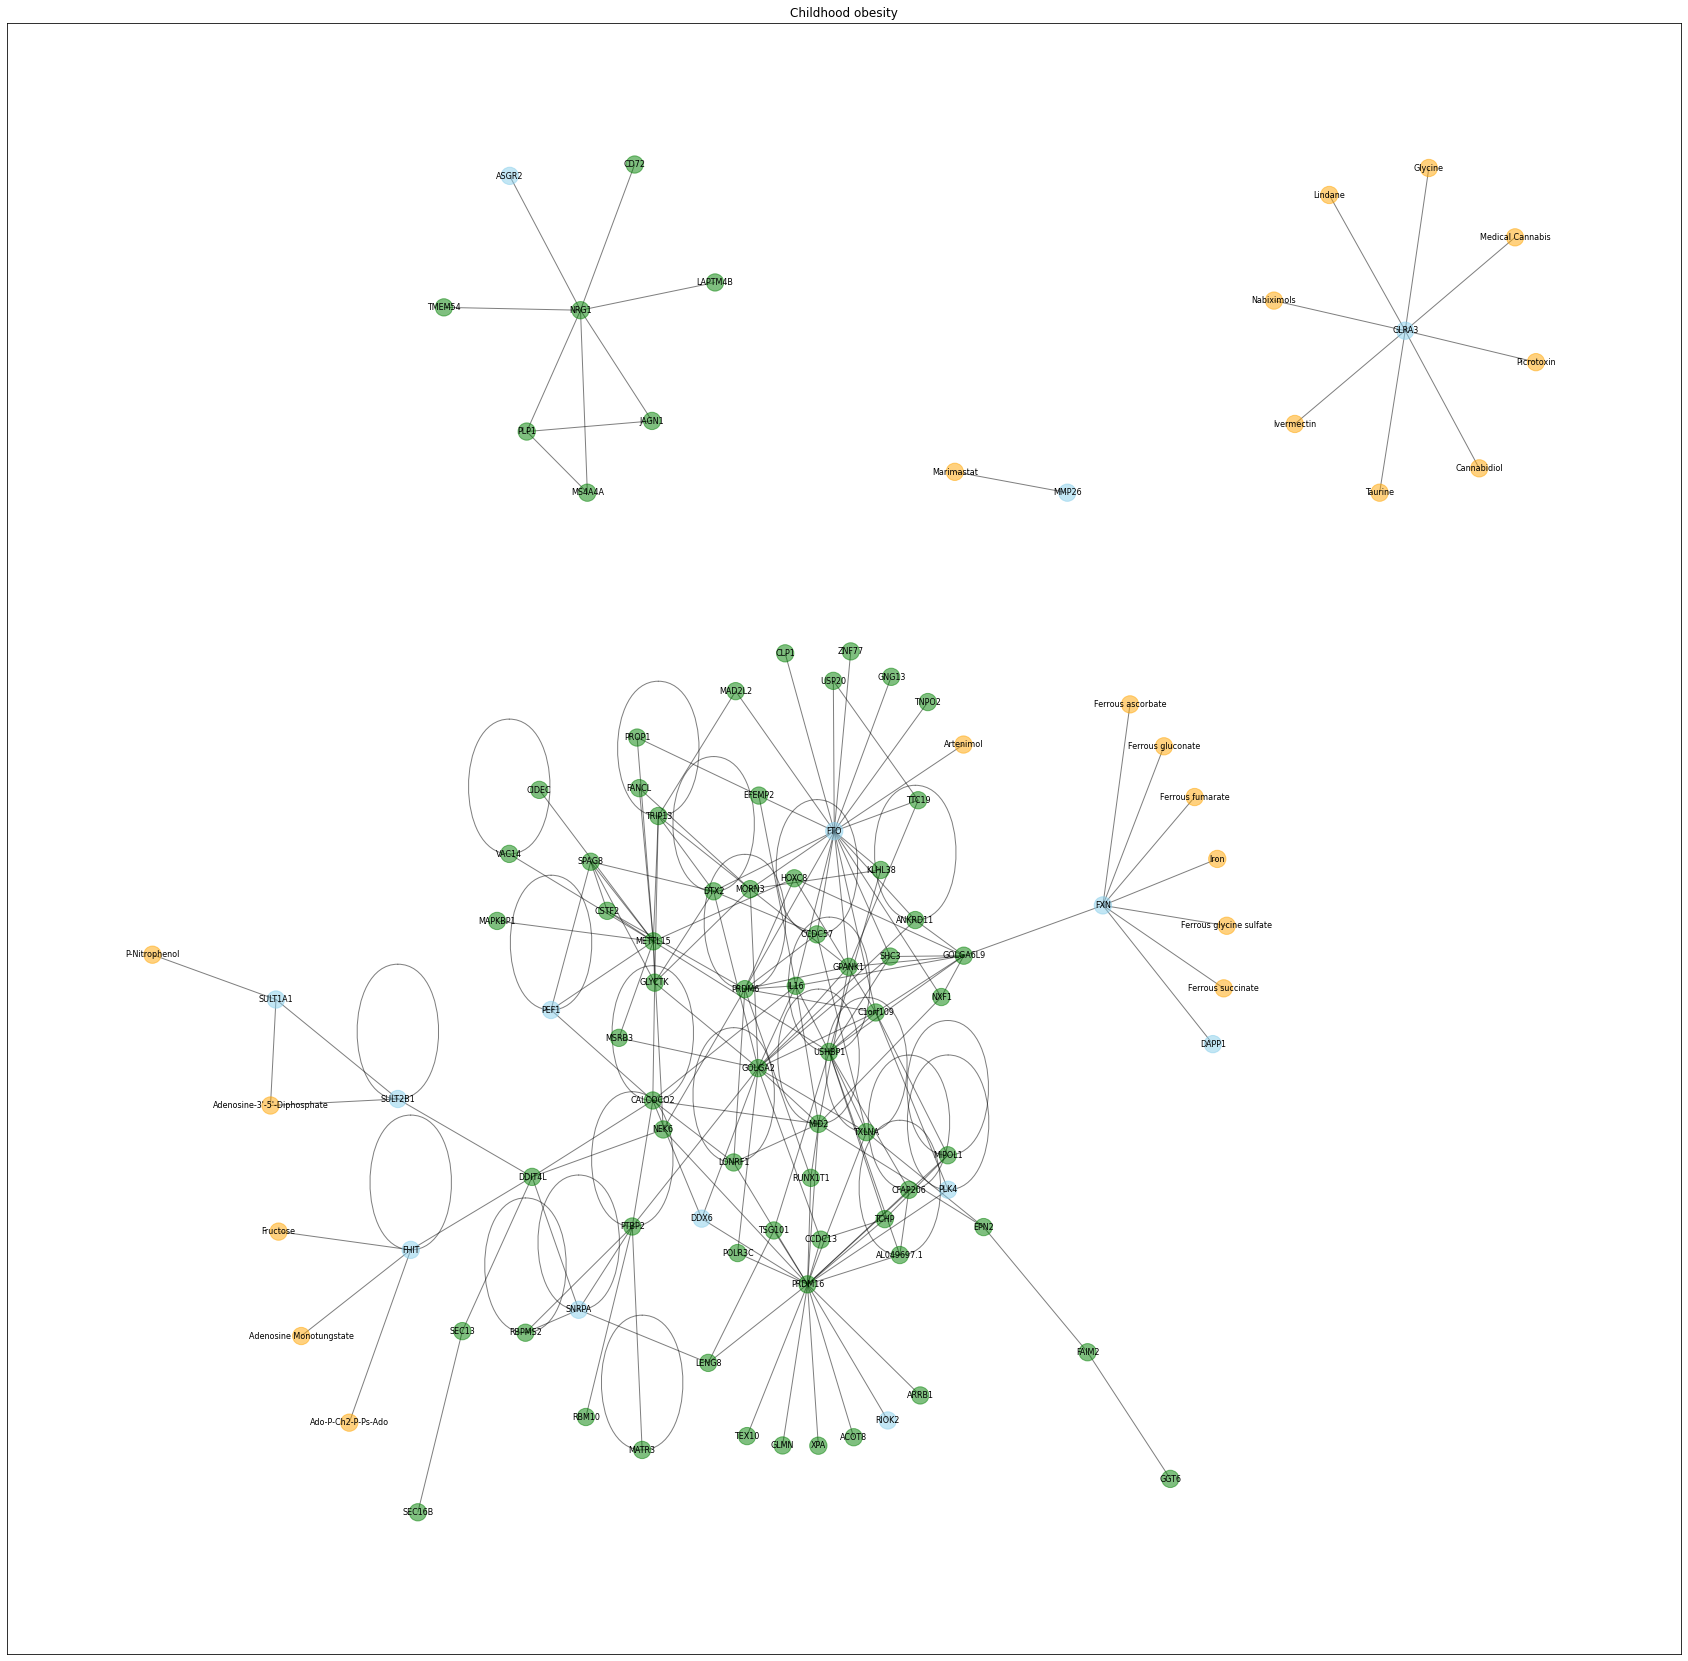

In [ ]:
pos = nx.nx_agraph.graphviz_layout(P,prog='neato')
node_colors=dict(P.nodes(data="node_color")).values()
# # Plot the graph
plt.figure(figsize=(30, 30))
nx.draw_networkx_nodes(P, pos=pos,node_size=300,alpha=0.5,node_color=node_colors)
nx.draw_networkx_edges(P, pos=pos,width=1,arrows=False,alpha=0.5)
# #Uncomment to label by node number
nx.draw_networkx_labels(P,pos=pos, font_size=8, alpha=1)
plt.title("Childhood obesity")
plt.show()

In [ ]:
nx.degree(P)

DegreeView({'Ferrous ascorbate': 1, 'RIOK2': 1, 'MATR3': 3, 'Nabiximols': 1, 'GLMN': 1, 'Cannabidiol': 1, 'MSRB3': 2, 'SEC16B': 1, 'TCHP': 4, 'DDIT4L': 6, 'GNG13': 1, 'PLP1': 3, 'Ferrous fumarate': 1, 'NXF1': 3, 'ACOT8': 1, 'EPN2': 3, 'CD72': 1, 'ANKRD11': 5, 'Glycine': 1, 'LONRF1': 6, 'MIPOL1': 5, 'P-Nitrophenol': 1, 'TSG101': 3, 'ASGR2': 1, 'RBPMS2': 4, 'SEC13': 2, 'SNRPA': 6, 'KLHL38': 3, 'CFAP206': 5, 'Medical Cannabis': 1, 'MORN3': 7, 'FXN': 8, 'METTL15': 14, 'RUNX1T1': 3, 'EFEMP2': 3, 'USP20': 2, 'SHC3': 4, 'Ado-P-Ch2-P-Ps-Ado': 1, 'SPAG8': 5, 'SULT1A1': 3, 'JAGN1': 2, 'USHBP1': 13, 'MAD2L2': 2, 'CALCOCO2': 10, 'DAPP1': 1, 'POLR3C': 2, 'GLRA3': 8, 'XPA': 1, 'CCDC57': 6, 'GOLGA6L9': 9, 'ARRB1': 1, 'DDX6': 3, 'FTO': 20, 'PEF1': 5, 'TTC19': 3, 'HOXC8': 4, 'GPANK1': 7, 'TRIP13': 7, 'VAC14': 3, 'IL16': 8, 'Artenimol': 1, 'PRDM16': 21, 'SULT2B1': 5, 'CCDC13': 3, 'DTX2': 8, 'RBM10': 1, 'TMEM54': 1, 'CIDEC': 1, 'Adenosine Monotungstate': 1, "Adenosine-3'-5'-Diphosphate": 2, 'GGT6': 1, 'M

Visualizamos en el subgrafo los nodos (en este caso los genes) que tienen más interacciones con otros del mismo.

In [ ]:
degree_countP = sorted(P.degree, key=lambda x: x[1], reverse=True)
nodeP, degreeP = zip(*degree_countP)
print(nodeP)
print(type(nodeP))
print(degreeP)
print(len(degreeP))

('PRDM16', 'FTO', 'GOLGA2', 'METTL15', 'USHBP1', 'PRDM6', 'MID2', 'CALCOCO2', 'GOLGA6L9', 'C1orf109', 'FXN', 'DTX2', 'GLRA3', 'PTBP2', 'IL16', 'MORN3', 'GPANK1', 'TRIP13', 'NRG1', 'GLYCTK', 'TXLNA', 'LONRF1', 'CCDC57', 'DDIT4L', 'FHIT', 'SNRPA', 'PEF1', 'SPAG8', 'ANKRD11', 'MIPOL1', 'AL049697.1', 'CFAP206', 'SULT2B1', 'PLK4', 'NEK6', 'TCHP', 'HOXC8', 'SHC3', 'RBPMS2', 'VAC14', 'DDX6', 'SULT1A1', 'CCDC13', 'TSG101', 'MATR3', 'KLHL38', 'PLP1', 'NXF1', 'RUNX1T1', 'TTC19', 'CSTF2', 'EFEMP2', 'LENG8', 'EPN2', 'SEC13', 'MSRB3', 'MS4A4A', 'PROP1', 'USP20', 'FAIM2', 'MAD2L2', 'FANCL', "Adenosine-3'-5'-Diphosphate", 'POLR3C', 'JAGN1', 'ACOT8', 'Iron', 'MMP26', 'TNPO2', 'Ferrous fumarate', 'Taurine', 'Adenosine Monotungstate', 'TEX10', 'ASGR2', 'Marimastat', 'Picrotoxin', 'GNG13', 'DAPP1', 'TMEM54', 'ZNF77', 'GLMN', 'GGT6', 'CIDEC', 'Fructose', 'LAPTM4B', 'XPA', 'Lindane', 'MAPKBP1', 'CD72', 'Ferrous succinate', 'Ferrous glycine sulfate', 'Ferrous gluconate', 'Artenimol', 'Nabiximols', 'Ivermect

Lo graficamos...

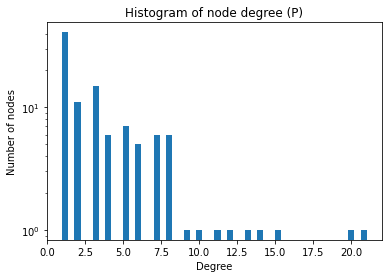

In [ ]:
degree=list(dict(nx.degree(P)).values())
plt.hist(degree,bins=50)
plt.title('Histogram of node degree (P)')
plt.ylabel('Number of nodes')
plt.xlabel('Degree')
plt.semilogy()
plt.show()

También revisamos los genes de la lista que escogimos (childhood obesity) esto para lograr ver los genes por orden de importancia utilizando el P-value

In [ ]:
childhood_obesity_top=childhood_obesity.sort_values(by="P-value")
top_gene_names=list(childhood_obesity_top["Mapped gene"][0:100])
print(top_gene_names)

['ADCY3', 'ZDBF2, ACER2P1', 'PTBP2', 'NDUFS5P2, RPL7P9', 'RBBP4P3', 'LINC01714, RNU6-991P', 'IRAIN, FAM169B', 'CEP162', 'LINC01029, RNU6-655P', 'CRISPLD2', 'GLRA3', 'INO80D, PPIAP68', 'SNORD81', 'FPGT-TNNI3K, TNNI3K', 'RN7SKP14, TOM1L1', "'-", 'CLPB, ART2BP', 'LINC00958', 'NRG1', "'-", "'-", 'OR51V1', 'RPL7AP28, SNHG27', 'LINC02208', 'RFC3P1', 'FXN', 'FAM155A', 'TFAP2B', 'SEC16B', 'TMEM18, LINC01875', 'MMP26', 'CRACD', 'CARD11', "'-", 'RN7SL89P, PPA2', 'SULT1A1', 'NUP98', 'RPL31P12, NEGR1', 'RNA5SP63', "'-", 'LINC01689, LINC01684', 'PRDM16', 'BMPER', 'LINC01440', 'VPS45, OTUD7B', 'METTL15', 'GPR1', 'GAS8, URAHP', 'FAIM2', 'FTO', 'BDNF-AS', "'-", 'RNU4-17P, RPS3AP49', 'BTF3P10, RAET1K', 'LINC02758', 'RPL35AP8, VIPR1', 'CACUL1', "'-", 'FHIT', 'LINC02503', 'RNU6-649P', "'-"]


In [ ]:
childhood_obesity_top["Mapped gene"][0:100].value_counts(ascending=False)

'-                      8
RN7SL89P, PPA2          1
INO80D, PPIAP68         1
TFAP2B                  1
RN7SKP14, TOM1L1        1
FHIT                    1
OR51V1                  1
RNU4-17P, RPS3AP49      1
CARD11                  1
LINC02208               1
LINC01714, RNU6-991P    1
METTL15                 1
CEP162                  1
LINC02503               1
LINC01689, LINC01684    1
LINC01029, RNU6-655P    1
VPS45, OTUD7B           1
NRG1                    1
FXN                     1
LINC00958               1
IRAIN, FAM169B          1
CRACD                   1
TMEM18, LINC01875       1
RPL7AP28, SNHG27        1
CLPB, ART2BP            1
ZDBF2, ACER2P1          1
MMP26                   1
GPR1                    1
RBBP4P3                 1
BTF3P10, RAET1K         1
SNORD81                 1
RPL35AP8, VIPR1         1
BDNF-AS                 1
FTO                     1
CRISPLD2                1
ADCY3                   1
SEC16B                  1
RPL31P12, NEGR1         1
CACUL1      

Con esto podemos decir que los principales de los genes (según el P-value) que son más importantes, que están relacionados a distancia 1 con un fármaco y que están en la red combinada acoplada a lista de genes (childhood obesity) :  FXN, FHIT y FTO


------------------------------------------------------------------------

Calculamos la distancia entre pares de nodos en la red combinada acoplados a la lista de genes asociados a la obesidad

In [ ]:
paths=nx.shortest_path(P)
distances=dict(nx.shortest_path_length(P))

In [ ]:
print(distances)

{'CLP1': {'CLP1': 0, 'FTO': 1, 'KLHL38': 2, 'MAD2L2': 2, 'GNG13': 2, 'SHC3': 2, 'IL16': 2, 'MORN3': 2, 'TNPO2': 2, 'CCDC57': 2, 'USP20': 2, 'DTX2': 2, 'ANKRD11': 2, 'EFEMP2': 2, 'ZNF77': 2, 'PRDM6': 2, 'NXF1': 2, 'GPANK1': 2, 'C1orf109': 2, 'Artenimol': 2, 'TTC19': 2, 'CALCOCO2': 3, 'RUNX1T1': 3, 'GOLGA2': 3, 'NEK6': 3, 'TXLNA': 3, 'GOLGA6L9': 3, 'SPAG8': 3, 'LONRF1': 3, 'PROP1': 3, 'MIPOL1': 3, 'GLYCTK': 3, 'TRIP13': 3, 'CSTF2': 3, 'USHBP1': 3, 'PLK4': 3, 'FANCL': 3, 'HOXC8': 3, 'MID2': 3, 'PTBP2': 4, 'CFAP206': 4, 'DDIT4L': 4, 'METTL15': 4, 'POLR3C': 4, 'EPN2': 4, 'DDX6': 4, 'TCHP': 4, 'FXN': 4, 'TSG101': 4, 'PEF1': 4, 'CCDC13': 4, 'MSRB3': 4, 'PRDM16': 4, 'AL049697.1': 4, 'SULT2B1': 5, 'Iron': 5, 'Ferrous gluconate': 5, 'RBM10': 5, 'MATR3': 5, 'GLMN': 5, 'MAPKBP1': 5, 'Ferrous ascorbate': 5, 'FHIT': 5, 'RBPMS2': 5, 'LENG8': 5, 'DAPP1': 5, 'FAIM2': 5, 'VAC14': 5, 'Ferrous fumarate': 5, 'ARRB1': 5, 'TEX10': 5, 'XPA': 5, 'SEC13': 5, 'Ferrous succinate': 5, 'CIDEC': 5, 'ACOT8': 5, 'RIOK

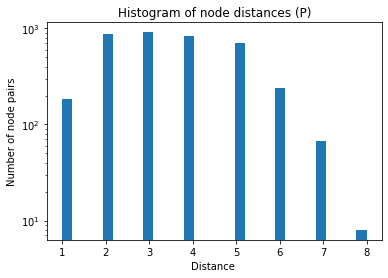

Time (s): 0.722846453999864


In [ ]:
from timeit import default_timer
start=default_timer()

distance_P=dict(nx.shortest_path_length(P))
#To get all distances, we need to make sure the node is reachable, so we need an if condition for each n1
distances_vals_P=[distance_P[n1][n2] for n1 in P.nodes() for n2 in P.nodes() if (n1>n2 and n2 in distance_P[n1].keys())]
plt.hist(distances_vals_P,bins=30)
plt.title('Histogram of node distances (P)')
plt.ylabel('Number of node pairs')
plt.xlabel('Distance ')
plt.semilogy()
plt.show()

end=default_timer()
print("Time (s):",end-start)

5.-También calculamos la distancia de los fármacos a los genes/proteínas en el subgrafo

In [ ]:
drug_names=[]
for node in PFI.nodes():
  if (PFI.nodes(data= "type")[node]!= "protein"):
    drug_names.append(node)
   

In [ ]:
print(drug_names)

['UNDECYLAMINE-N,N-DIMETHYL-N-OXIDE', "Diguanosine-5'-Triphosphate", "Guanosine-5'-Triphosphate", 'Zinc', 'Copper', 'Zinc acetate', 'Zinc chloride', 'Becaplermin', 'Cisplatin', 'Bacitracin', 'Ocriplasmin', 'Silver', 'N-Acetylmethionine', 'O-Succinylbenzoate', 'N-Succinyl Phenylglycine', 'N-Succinyl Methionine', "3'-Phosphate-Adenosine-5'-Diphosphate", 'Coenzyme A', 'Ribostamycin', 'Spermidine', 'Gibberellic acid', 'GIBBERELLIN A4', 'Pyridoxal phosphate', 'Glutamic Acid', 'Fostamatinib', 'Coa-S-Trimethylene-Acetyl-Tryptamine', 'Coa-S-Acetyl Tryptamine', 'Coa-S-Acetyl 5-Bromotryptamine', 'L-Alanine', 'NADH', 'Nadph Dihydro-Nicotinamide-Adenine-Dinucleotidephosphate', 'N-(5-Amino-5-Carboxypentyl)Glutamic Acid', 'Puromycin', '(1S)-1-AMINO-2-(1H-INDOL-3-YL)ETHANOL', '2-(1H-INDOL-3-YL)ACETAMIDE', '2-(1H-INDOL-3-YL)ETHANAMINE', '2-(4-METHOXYPHENYL)ACETAMIDE', 'Pyruvic acid', 'Valproic Acid', 'Phenelzine', 'Vigabatrin', '(4e)-4-Aminohex-4-Enoic Acid', '4-Amino Hexanoic Acid', 'ATP', 'Glyburide

Time (s): 31.29231724500005


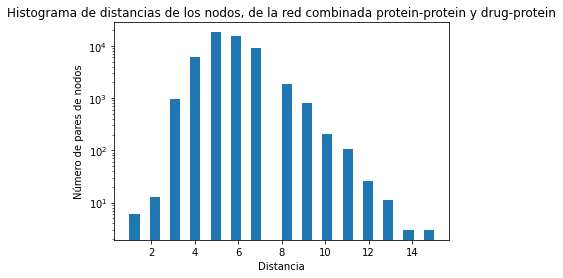

In [ ]:
from timeit import default_timer
start= default_timer()

distances_PPI_D=dict()
proteins=list(overlap)
drugs=drug_names
for nodel in proteins:
  distances_PPI_D[nodel]=dict()
  for node2 in drugs:
    if(nx.has_path(G_Combined_Networks, source=nodel, target=node2)):
      distances_PPI_D[nodel][node2]=nx.shortest_path_length(G_Combined_Networks, source=nodel, target=node2)
end=default_timer()
print("Time (s):", end-start)

distances_vals_human=[distances_PPI_D[nl][n2] for nl in proteins for n2 in drugs if (nl>n2 in distances_PPI_D[nl].keys())]
plt.hist(distances_vals_human, bins=30)
plt.title ("Histograma de distancias de los nodos, de la red combinada protein-protein y drug-protein")
plt.ylabel("Número de pares de nodos")
plt.xlabel("Distancia")
plt.semilogy()
plt.show()

Por distancia podemos decir que poco menos de 10 fármacos tienen relación directa con un gen/proteína por lo que podemos decidir entre alguno de estos, aunado a que al mismo tiempo estos genes proteínas están relacionados con muchos otros más.

Con todo lo anterior podemos decir que nuestros tres candidatos para fármacos que puedan ser utiles en la obesidad infantil son: **1.-Monotungstato de Adenosina (Adenosine monotungstate, FHIT);2.-Fumarato ferroso (ferrous fumarate, FXN);3.-Artenimol(FTO)**